# GAN et cGAN

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Embedding, Multiply, multiply
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

## Données

Pour ce TP nous allons travailler avec les données MNIST celle-ci sont disponnible dans Keras et nous pouvons les charger avec la fonction load_mnist. Ce sont des images de chiffre manuscrits de 28 pixels par 28 pixels en noirs et blanc. Pour simplifier la suite nous transformons les valeurs d'intensité entre 0 et 256 par des flottants entre -1 et 1 et mettons en forme les données dans des tenseurs aux dimensions adaptés.

In [2]:
# Chargement des données
(Xtrain, ytrain), (_, _) = mnist.load_data()
# Remise a l'échelle entre -1 et 1
Xtrain = Xtrain / 127.5 - 1.
Xtrain = np.expand_dims(Xtrain, axis=3)
ytrain = ytrain.reshape(-1,1)

11493376/11490434 [==============================] - 7s 1us/step


Nous obtennons un tenseurs de 60 000 images de taille 28 par 28 avec 1 seul canal. 

In [3]:
Xtrain.shape

(60000, 28, 28, 1)

Vous pouvez grâce à cette cellule observer un exemple d'image tirer aléatoirement dans le jeux de données

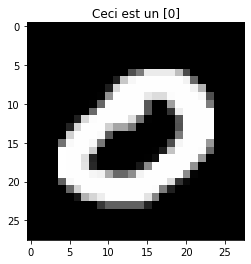

In [4]:
i = np.random.randint(0,Xtrain.shape[0])
img_s = Xtrain[i,:,:,0]
p=plt.imshow(img_s,cmap='gray')
t=plt.title("Ceci est un {}".format(ytrain[i]))

# GAN

Nous allons utliser ces images pour créer un GAN capable de générer des images de chiffres manuscrits réalistes. Dans cette première partie nous ne nous intéressons donc qu'a Xtrain comme données. Un gan est composé d'un générateur et d'un discriminateur dont les poids sont estimés conjoitement. Je vous rappel le schéma de fonctionnement de cette méthode :

![GAN](./gan.png "Gan")

Le code suivant contient le template d'une class GAN. 

### Questions

- complétez la méthode build_discriminator les commentaires vous décrivent son fonctionnement
- complétez la méthode build_generator les commentaires vous décrivent son fonctionnement
- complétez la méthode train les commentaires vous décrivent son fonctionnement
- testez votre GAN sur les données MNIST observé les échantillons produits

In [33]:
class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Construction et compilation du disciminateur
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Construction du générateur
        self.generator = self.build_generator()

        # Pour optimiser les paramètres du générateur nous devons le coupler au discriminateur
        # Construisons pour cela un modèle qui combine les deux
        # Le modèle combiné par d'un vecteur aléatoire dans l'espace latent
        z = Input(shape=(self.latent_dim,))
        # Il construit ensuite une image avec le génarateur
        img = self.generator(z)

        # Et la passe au discriminateur
        validity = self.discriminator(img)

        # Le modèle combiné permet de passer de z a une décision image réelle ou simulée ?
        self.combined = Model(z, validity)
        
        # Pour optimiser le générateur les poids du discriminateur doivent être fixés
        self.discriminator.trainable = False
        
        
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


    def build_generator(self):
        
        # Le générateur doit être un modèle Keras 
        # il prend entrée un vecteur aléatoire de dimension self.latent_dim
        
        z = Input(shape=(self.latent_dim,))
        
        # il produit des images de taille (self.img_rows, self.img_cols, self.channels)
        # et a l'architecture suivante :
        # - couche dense de taille 256 activation leakyRelu avec alpha=0.2
        # - couche de normalisation batch momentum=0.8
        # - couche dense de taille 512 activation leakyRelu avec alpha=0.2
        # - couche de normalisation batch momentum=0.8
        # - couche dense de taille 1024 activation leakyRelu avec alpha=0.2
        # - couche de normalisation batch momentum=0.8
        # - couche dense de taille img_rows*img_cols activation tanh (les images ont été normalisées entre [-1,1])
        # - une couche de remise en format pour passer au format (self.img_rows, self.img_cols, self.channels)

        ## CODE ##
        
        return Model(z, img)

    def build_discriminator(self):

        # Le disciminateur doit être un modèle Keras 
        # il prend entrée une image de taille (self.img_rows, self.img_cols, self.channels)
        
        img = Input(shape=self.img_shape)
        
        # il produit un chiffre 'validity' entre [0,1] 0 image produite par le générateur, 1 image réelles  
        # et a l'architecture suivante :
        # - Couche de mise a plat de l'image 
        # - couche dense de taille 512 activation leakyRelu avec alpha=0.2
        # - couche dense de taille 256 activation leakyRelu avec alpha=0.2
        # - couche dense de taille 1 activation sigmoid
        
        ## CODE ##
        
        return Model(img, validity)

    def train(self,X_train, epochs, batch_size=128, sample_interval=50):


        # vecteur de labels
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Apprentissage du discriminateur
            # ---------------------

            # Sélectionner batch_size images aléatoirement dans Xtrain

            ## CODE ##
            
            # Générer batch_size images grace au générateur et a sa méthode predict 
            # celle ci attend en entrée une (matrice batch_size, self.latent_dim) de chiffre aléatoire 
            # utiliser np.random.normal pour les générer

            ## CODE ##

            # utiliser la méthode train on batch du disciminateur pour mettre a jour ses poids 
            # une premier fois avec les images réelles et le vecteur de labels valid
            # une seconde fois avec les images générées et le vecteur de labels fake
            # récupérer les valeurs des fonctions de cout et faites une moyenne
            # récupérer la valeur de la fonction de cout combiner dans une variable d_loss

            
            ## CODE ##
            
            # ---------------------
            #  Apprentissage du générateur
            # ---------------------

            # créer les entrées du générateur
            # celui-ci ci attend en entrée une (matrice Z batch_size, self.latent_dim) de chiffre aléatoire 
            # utiliser np.random.normal pour les générer
            
            ## CODE ##

            # Utiliser la méthode train_on_batch du modèle combiné avec Z et le vecteur de label 'valid' en sorties
            # Le générateur doit tromper le discriminateur !
            # récupérer la valeur de la fonction de cout dans une variable g_loss

            ## CODE ##

            # Observons notre progressions de temps en temps
            if epoch % sample_interval == 0:
                 # Plot the progress
                print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f,  acc.: %.2f%%]" % (epoch, d_loss[0], 100*d_loss[1], g_loss[0],100*d_loss[1]))
                self.sample_images(epoch)

    # fonction permettant de générer quelques images avec le générateur
    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1

## GAN expérience 
Vous pouvez tester votre code avec les cellules suivante. La première ne fait qu'un tout petit apprentissage pour debugguer. La seconde un apprentissage plus conséquent.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_35 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
dense_50 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)               2048      
_________________________________________________________________
dense_51 (Dense)             (None, 1024)              525312    
__________

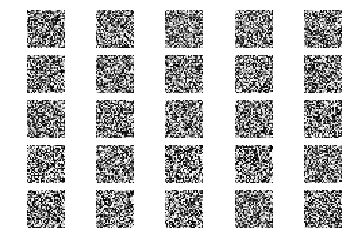

In [34]:
gan = GAN()
gan.train(Xtrain,epochs=200, batch_size=32, sample_interval=200)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 256)               1024      
_________________________________________________________________
dense_57 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_41 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 512)               2048      
_________________________________________________________________
dense_58 (Dense)             (None, 1024)              525312    
__________

/home/come/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


4200 [D loss: 0.606898, acc.: 64.06%] [G loss: 0.956515,  acc.: 64.06%]
4400 [D loss: 0.614115, acc.: 62.50%] [G loss: 0.933494,  acc.: 62.50%]
4600 [D loss: 0.639966, acc.: 68.75%] [G loss: 0.899235,  acc.: 68.75%]
4800 [D loss: 0.697287, acc.: 57.81%] [G loss: 0.950372,  acc.: 57.81%]
5000 [D loss: 0.604853, acc.: 70.31%] [G loss: 0.864901,  acc.: 70.31%]
5200 [D loss: 0.577957, acc.: 68.75%] [G loss: 0.968042,  acc.: 68.75%]
5400 [D loss: 0.652023, acc.: 54.69%] [G loss: 1.002489,  acc.: 54.69%]
5600 [D loss: 0.630884, acc.: 59.38%] [G loss: 0.968923,  acc.: 59.38%]
5800 [D loss: 0.601602, acc.: 71.88%] [G loss: 1.069443,  acc.: 71.88%]
6000 [D loss: 0.617711, acc.: 67.19%] [G loss: 1.103691,  acc.: 67.19%]
6200 [D loss: 0.681467, acc.: 60.94%] [G loss: 0.925648,  acc.: 60.94%]
6400 [D loss: 0.597938, acc.: 73.44%] [G loss: 1.007449,  acc.: 73.44%]
6600 [D loss: 0.577747, acc.: 65.62%] [G loss: 0.955050,  acc.: 65.62%]
6800 [D loss: 0.630108, acc.: 60.94%] [G loss: 0.986180,  acc.: 

26800 [D loss: 0.572705, acc.: 67.19%] [G loss: 1.106922,  acc.: 67.19%]
27000 [D loss: 0.713306, acc.: 53.12%] [G loss: 0.980423,  acc.: 53.12%]
27200 [D loss: 0.666221, acc.: 62.50%] [G loss: 1.016919,  acc.: 62.50%]
27400 [D loss: 0.610046, acc.: 67.19%] [G loss: 1.196684,  acc.: 67.19%]
27600 [D loss: 0.615597, acc.: 64.06%] [G loss: 1.054713,  acc.: 64.06%]
27800 [D loss: 0.589450, acc.: 73.44%] [G loss: 1.034561,  acc.: 73.44%]
28000 [D loss: 0.596915, acc.: 67.19%] [G loss: 1.093121,  acc.: 67.19%]
28200 [D loss: 0.679108, acc.: 57.81%] [G loss: 0.967361,  acc.: 57.81%]
28400 [D loss: 0.609655, acc.: 65.62%] [G loss: 1.006038,  acc.: 65.62%]
28600 [D loss: 0.570388, acc.: 70.31%] [G loss: 1.032375,  acc.: 70.31%]
28800 [D loss: 0.611815, acc.: 64.06%] [G loss: 1.097049,  acc.: 64.06%]
29000 [D loss: 0.544236, acc.: 68.75%] [G loss: 0.975100,  acc.: 68.75%]
29200 [D loss: 0.581394, acc.: 65.62%] [G loss: 0.983665,  acc.: 65.62%]
29400 [D loss: 0.684111, acc.: 54.69%] [G loss: 1.2

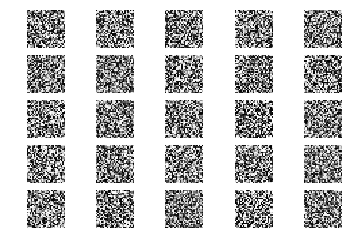

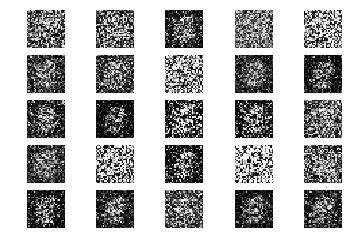

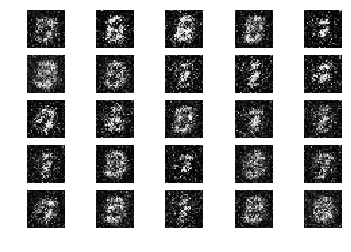

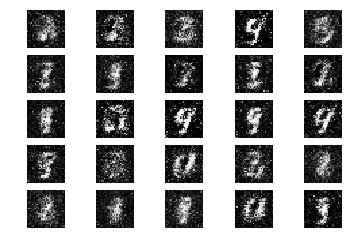

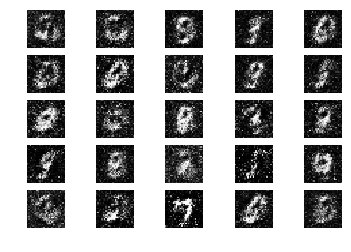

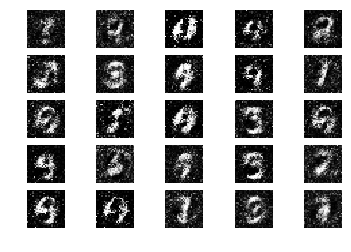

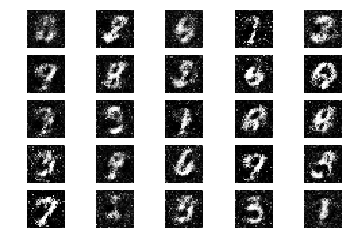

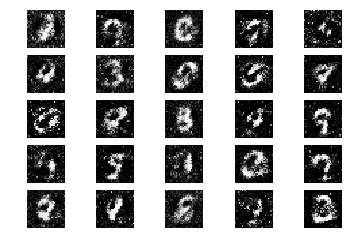

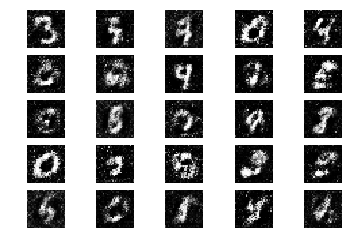

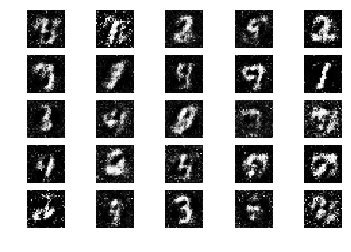

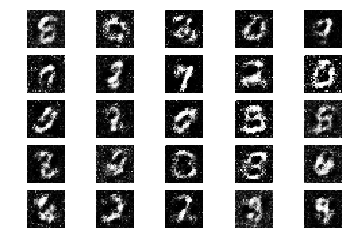

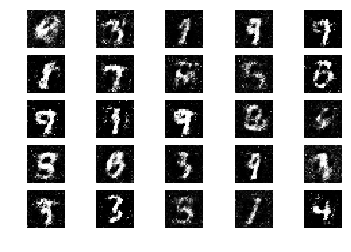

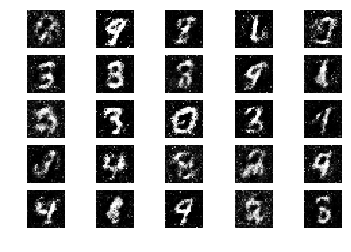

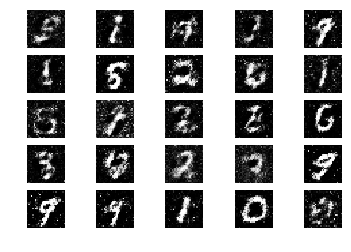

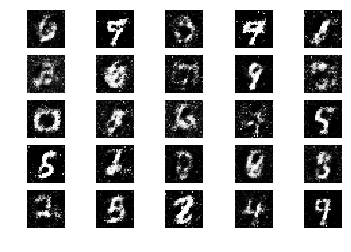

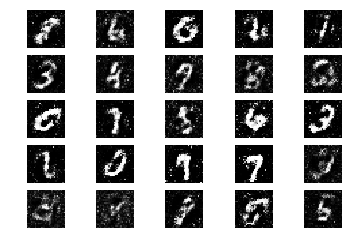

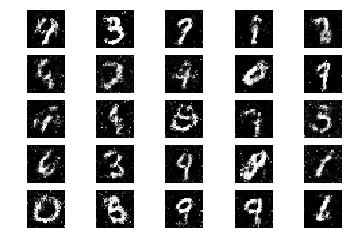

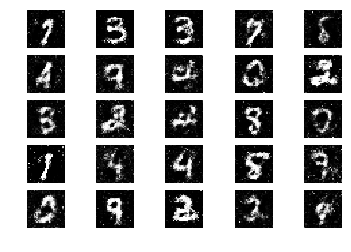

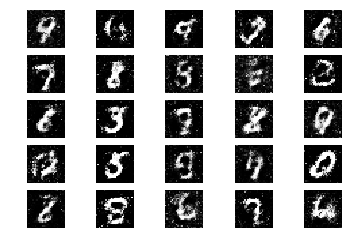

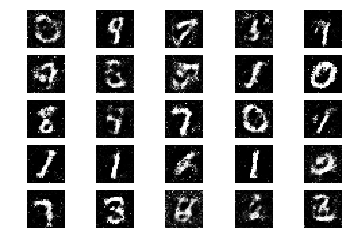

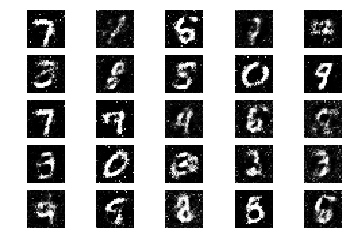

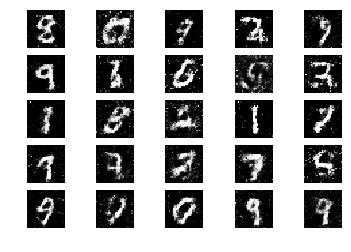

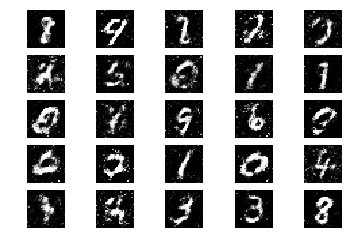

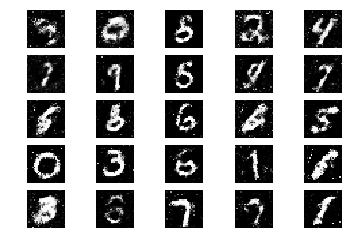

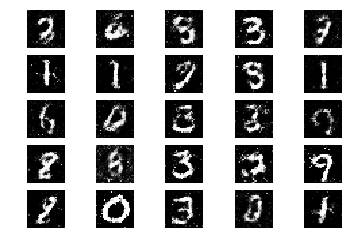

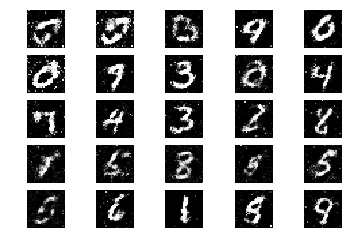

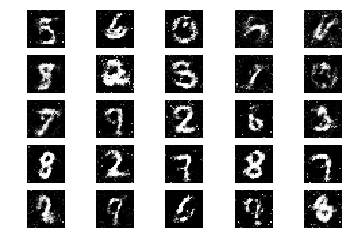

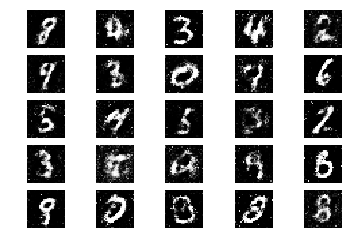

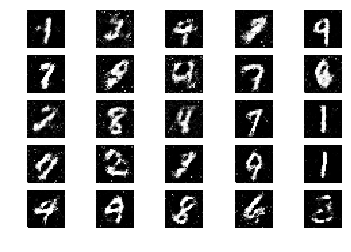

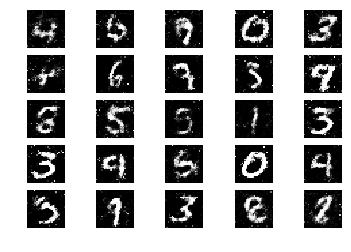

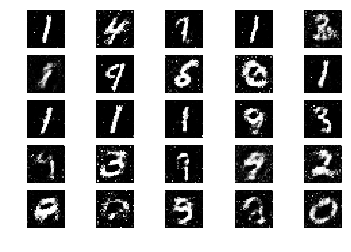

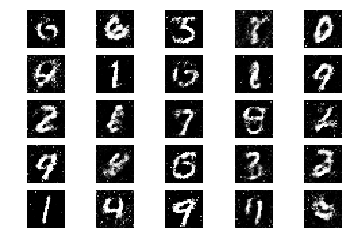

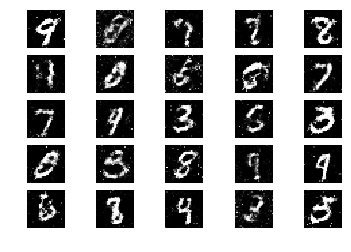

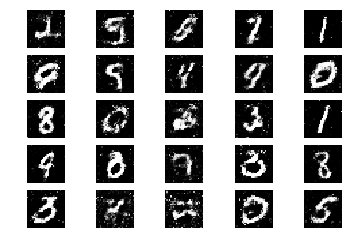

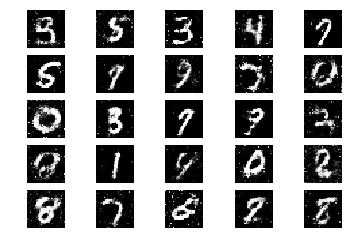

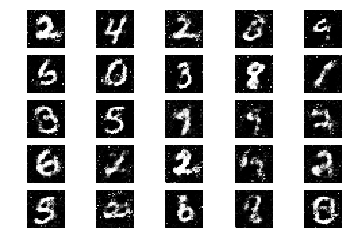

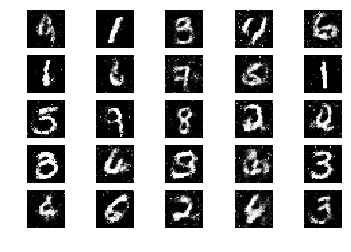

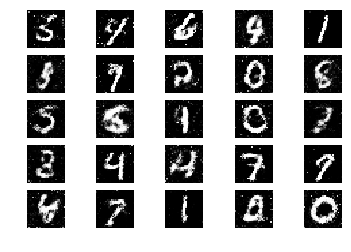

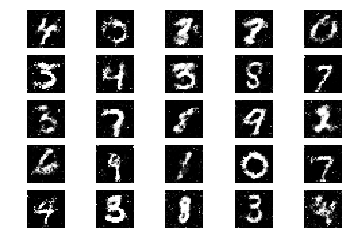

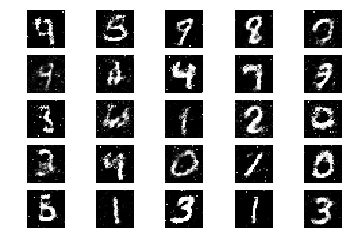

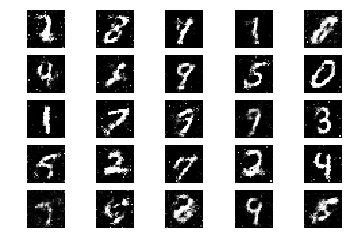

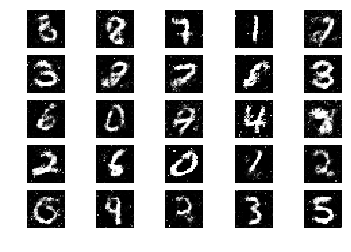

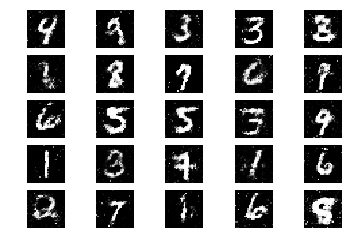

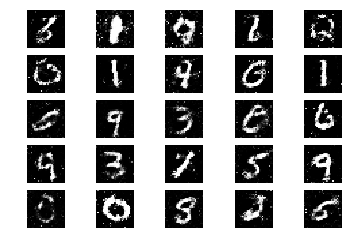

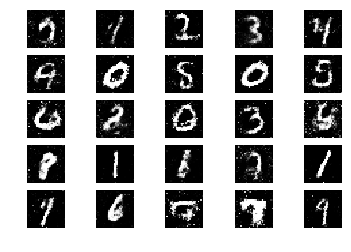

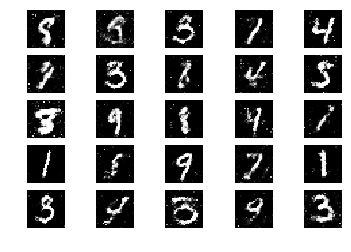

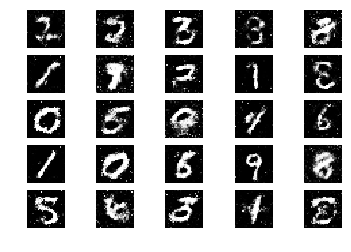

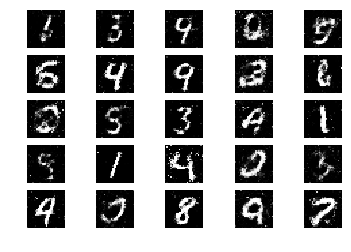

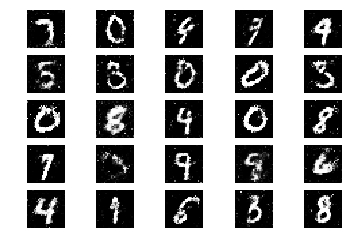

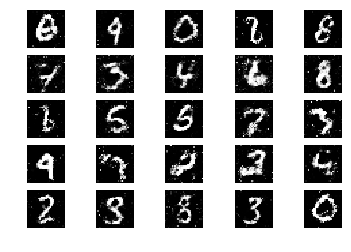

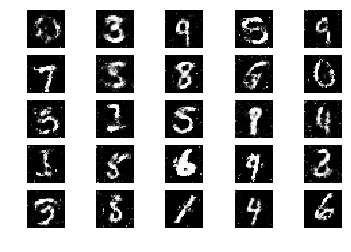

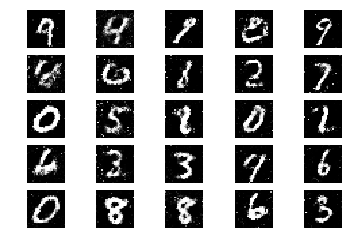

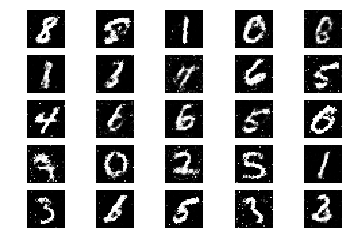

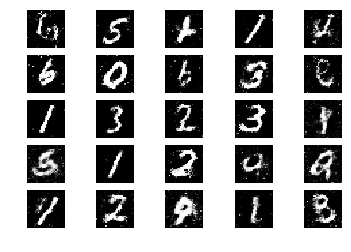

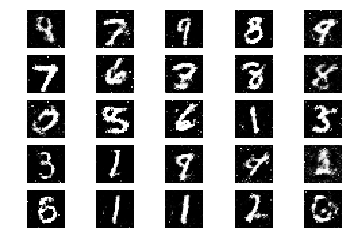

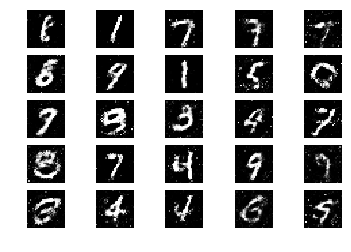

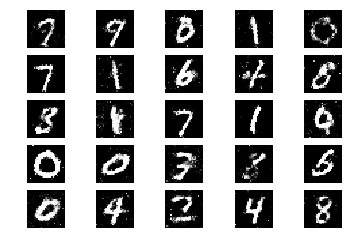

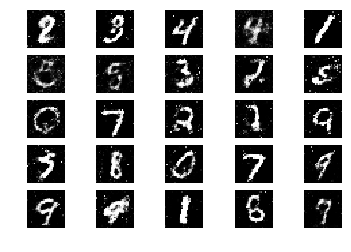

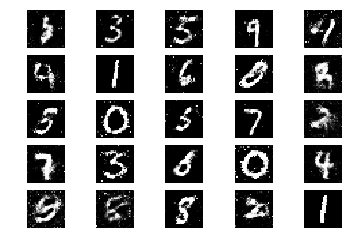

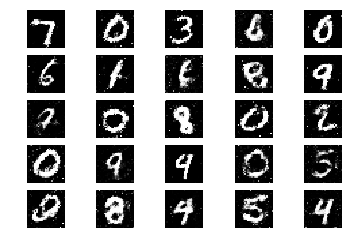

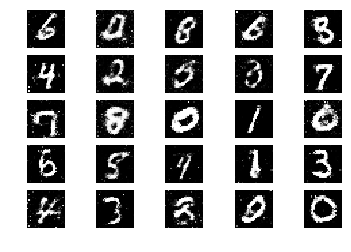

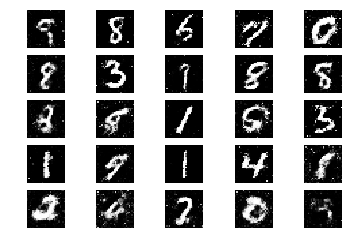

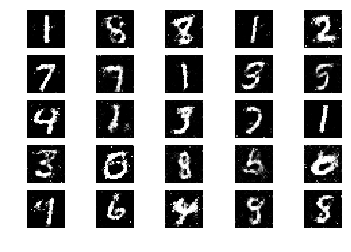

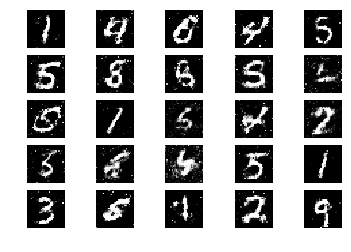

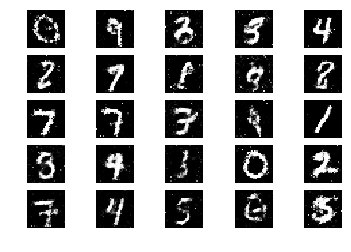

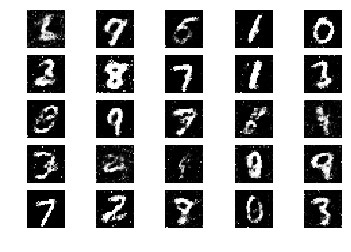

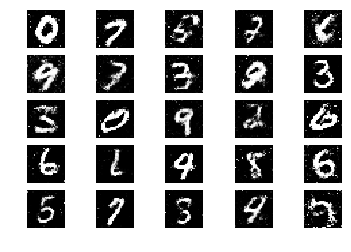

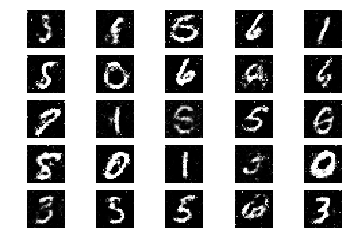

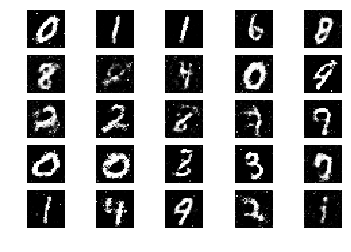

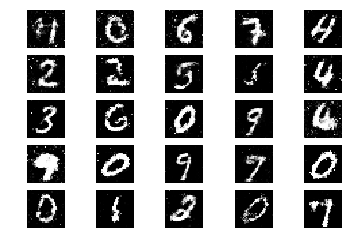

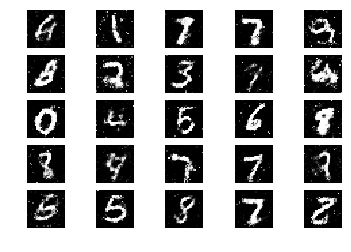

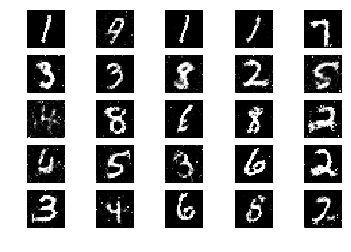

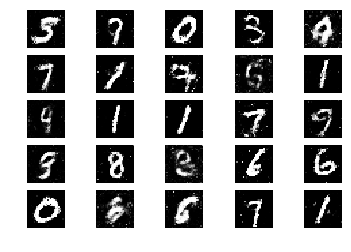

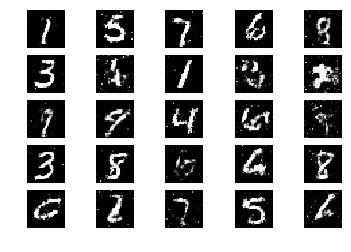

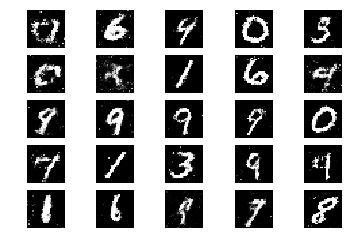

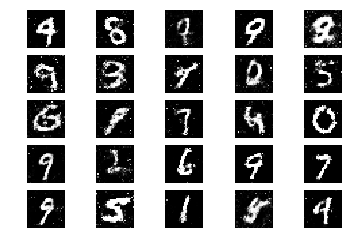

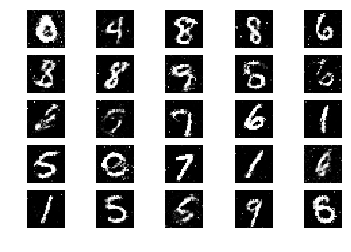

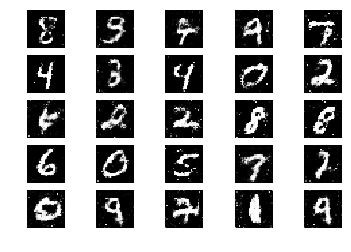

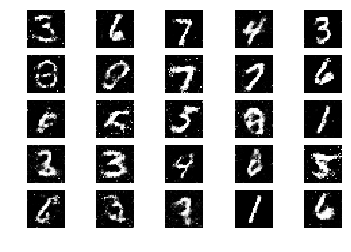

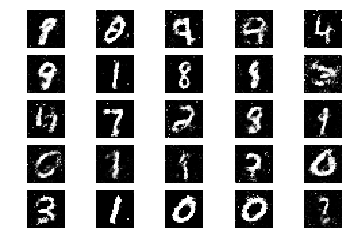

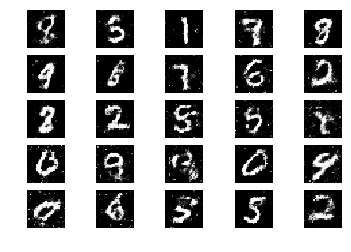

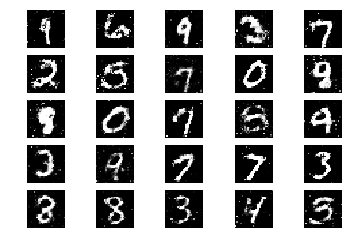

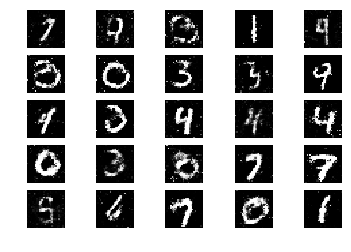

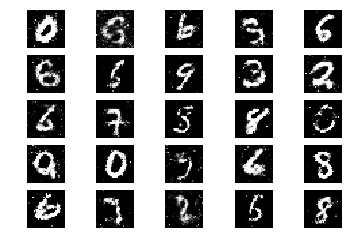

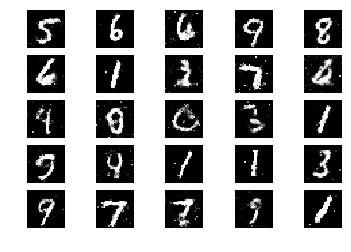

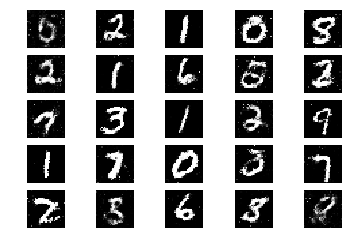

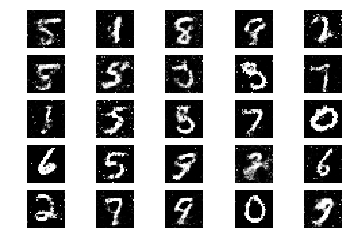

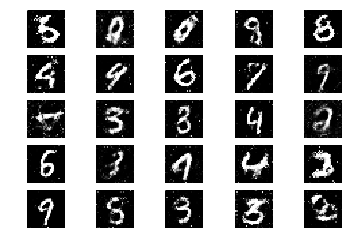

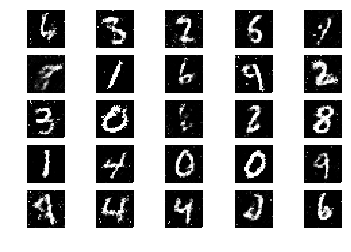

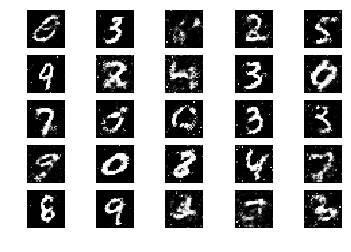

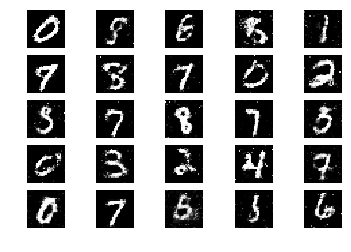

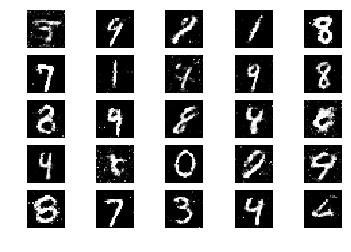

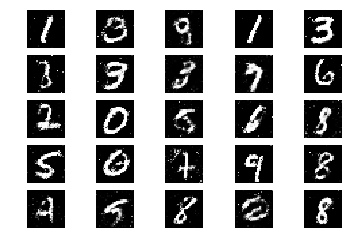

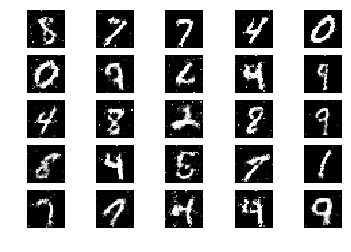

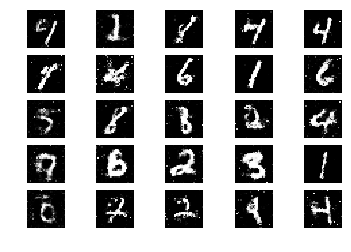

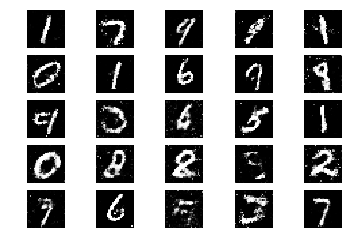

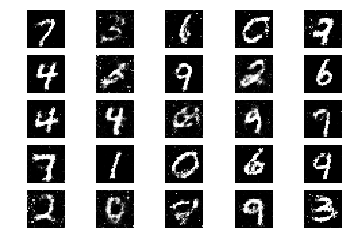

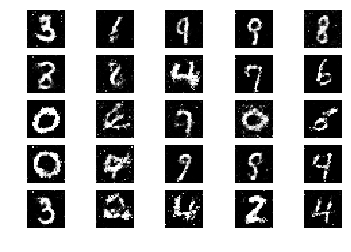

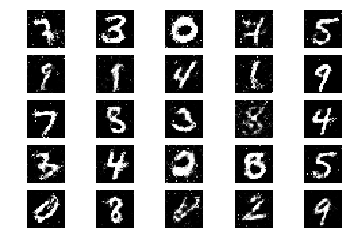

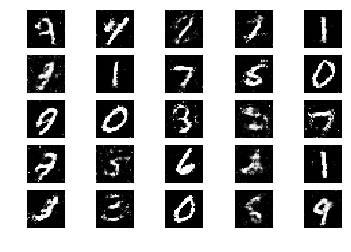

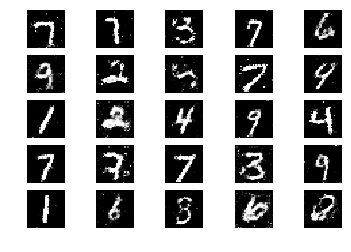

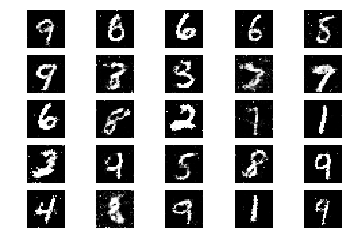

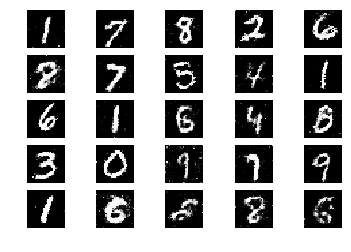

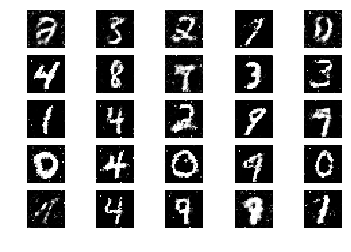

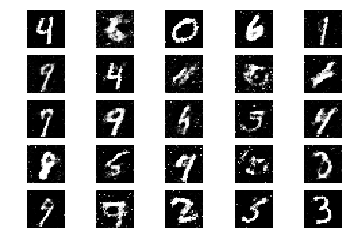

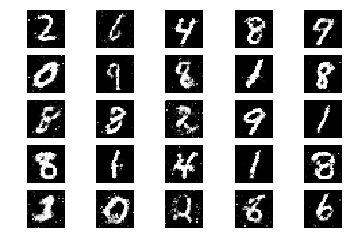

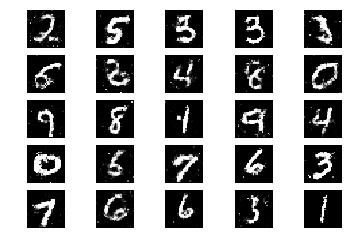

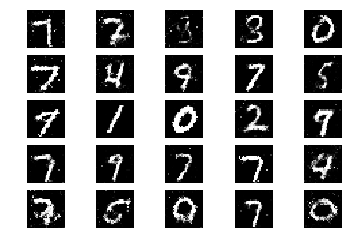

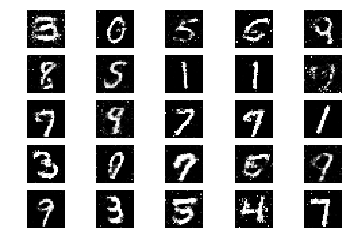

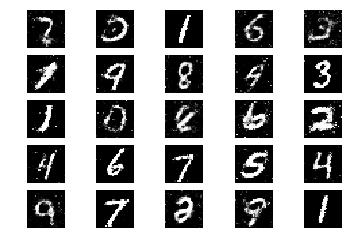

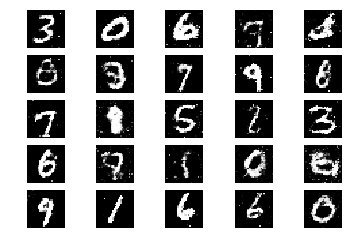

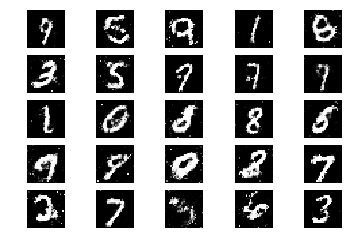

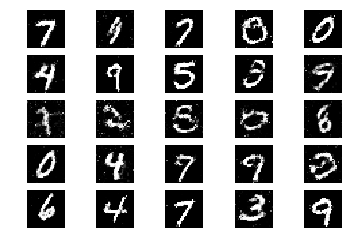

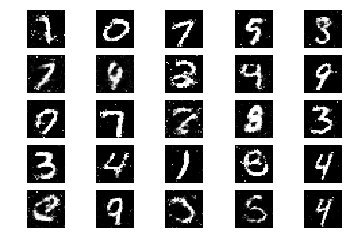

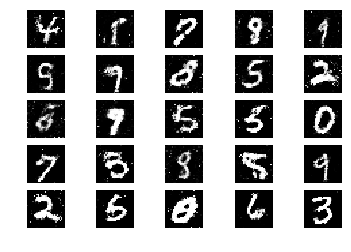

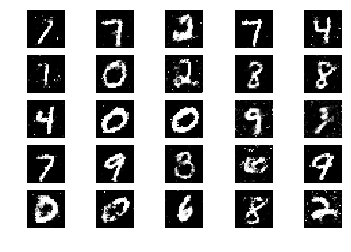

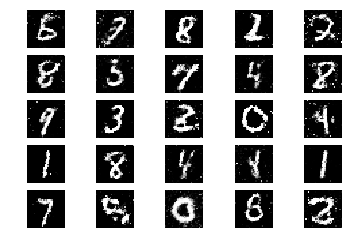

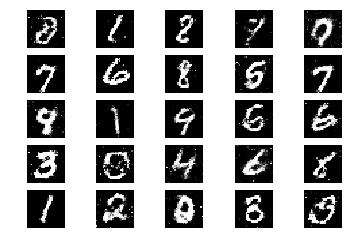

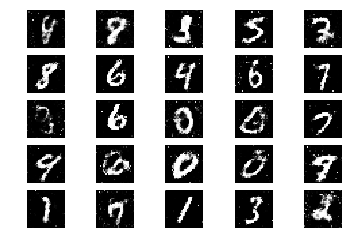

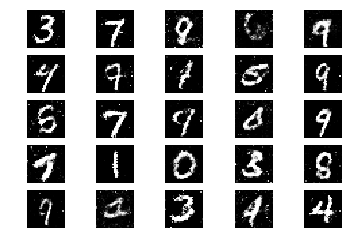

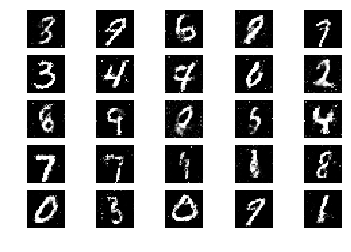

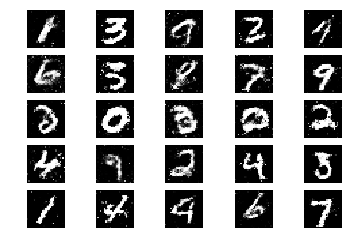

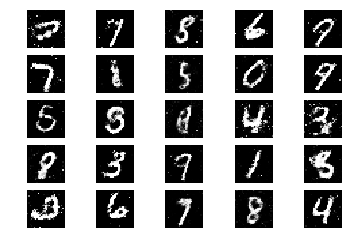

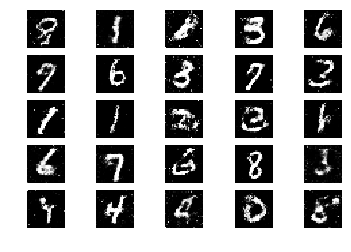

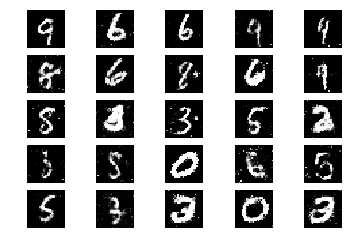

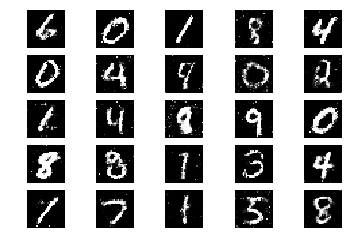

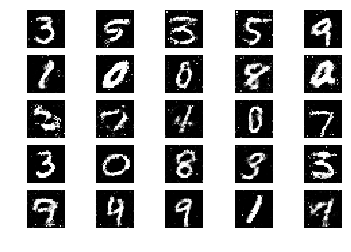

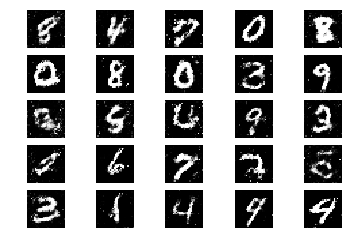

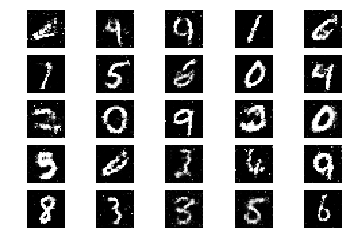

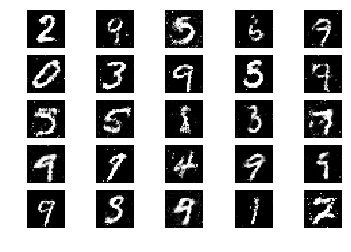

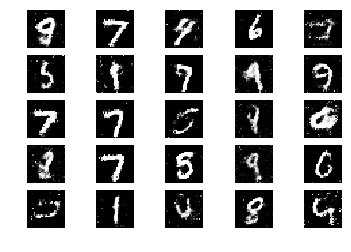

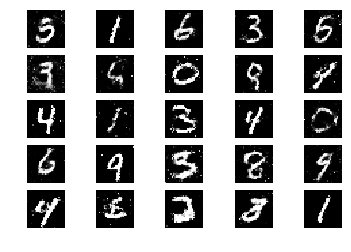

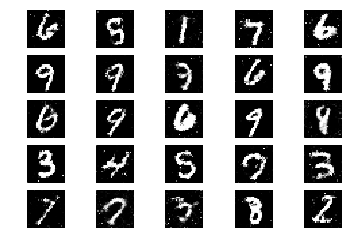

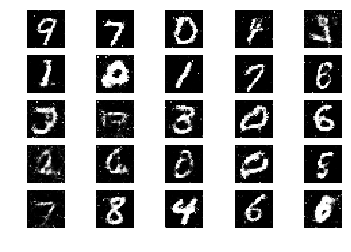

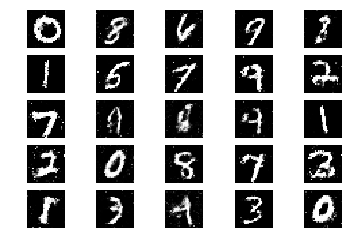

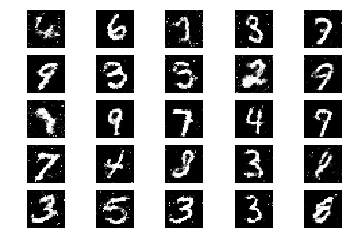

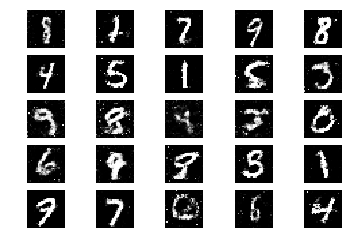

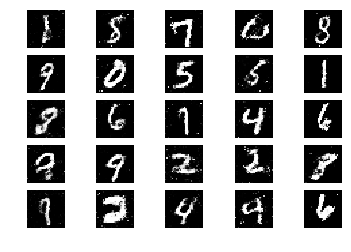

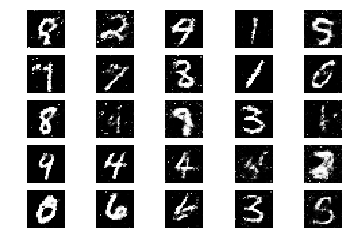

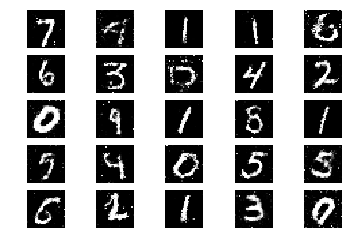

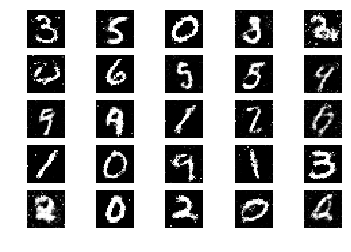

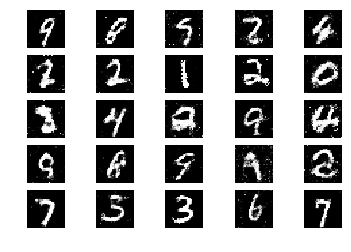

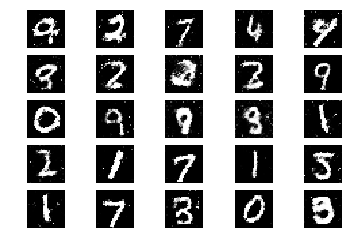

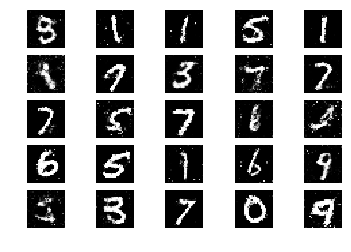

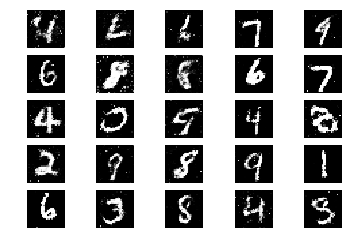

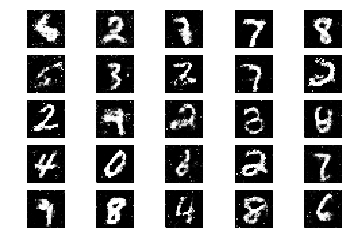

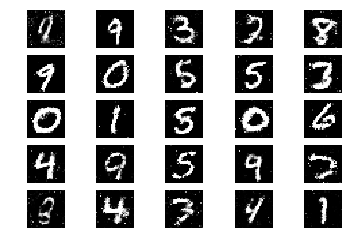

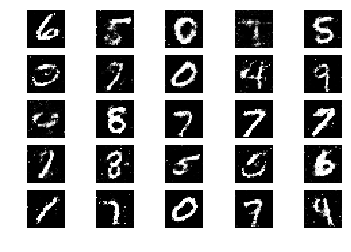

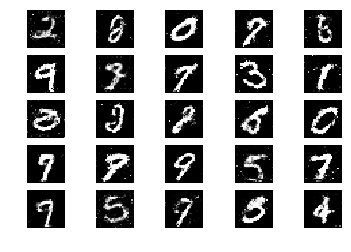

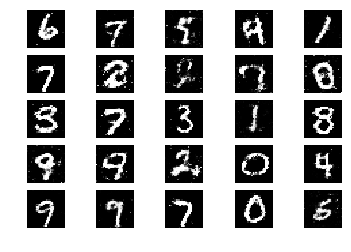

In [35]:
gan = GAN()
gan.train(Xtrain,epochs=20000, batch_size=32, sample_interval=1000)

# CGAN

Nous allons maintenant utliser ces images et leurs labels pour créer un GAN Conditionel capable de générer des images de chiffres manuscrits réalistes à partir d'un chiffre données en entrée. Dans cette première partie nous ne nous intéressons donc qu'a Xtrain comme données. Un gan est composé d'un générateur et d'un discriminateur dont les poids sont estimés conjoitement. Je vous rappel le schéma de fonctionnement de cette méthode :

![GAN](./cgan.png "Gan")

Le code suivant contient le template d'une class GAN. 

### Questions

- complétez la méthode build_discriminator les commentaires vous décrivent son fonctionnement
- complétez la méthode build_generator les commentaires vous décrivent son fonctionnement
- complétez la méthode train les commentaires vous décrivent son fonctionnement
- testez votre GAN sur les données MNIST observé les échantillons produits


In [108]:
class CGAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100
        # nombre de classes
        self.num_classes = 10

        optimizer = Adam(0.0002, 0.5)

        # Construction et compilation du disciminateur
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Construction du générateur
        self.generator = self.build_generator()

        # Pour optimiser les paramètres du générateur nous devons le coupler au discriminateur
        # Construisons pour cela un modèle qui combine les deux
        # Le modèle combiné part d'un vecteur aléatoire dans l'espace latent ! et d'un label !
        z = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        
        # Il construit ensuite une image avec le génarateur
        img = self.generator([z,label])

        # Et la passe au discriminateur accompagné de son label
        validity = self.discriminator([img, label])

        # Le modèle combiné permet de passer de z a une décision image réelle ou simulée ?
        self.combined = Model([z,label], validity)
        # Pour optimiser le générateur les poids du discriminateur doivent être fixés
        self.discriminator.trainable = False
        # Une fois le modèle combiné compiler l'optimisation ne se fera que sur les poids du générateur
        self.combined.compile(loss=['binary_crossentropy'], optimizer=optimizer)

    def build_generator(self):

        # Le générateur doit être un modèle Keras 
        # il prend entrée un vecteur aléatoire z de dimension self.latent_dim et un label
        
        z = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        
        # il produit des images (img) de taille (self.img_rows, self.img_cols, self.channels)
        # et a l'architecture suivante :
        # - les labels sont projetés dans un espace de dimension self.latent_dim grâce à un Embedding
        # - les labels projetés sont multiplié avec z
        # - le résultats de la multiplication est mis en entrée du réseau génératif utilisé pour le GAN 
        # - couche dense de taille 256 activation leakyRelu avec alpha=0.2
        # - couche de normalisation batch momentum=0.8
        # - couche dense de taille 512 activation leakyRelu avec alpha=0.2
        # - couche de normalisation batch momentum=0.8
        # - couche dense de taille 1024 activation leakyRelu avec alpha=0.2
        # - couche de normalisation batch momentum=0.8
        # - couche dense de taille img_rows*img_cols activation tanh (les images ont été normalisées entre [-1,1])
        # - une couche de remise en format pour passer au format (self.img_rows, self.img_cols, self.channels)
        
        
        ## CODE ##

        return Model([z, label], img)

    def build_discriminator(self):

        
        # Le disciminateur doit être un modèle Keras 
        # il prend entrée une image de taille (self.img_rows, self.img_cols, self.channels) et un label
        
        img = Input(shape=self.img_shape)
        label = Input(shape=(1,), dtype='int32')
        
        # il produit un chiffre entre [0,1] : 0 image produite par le générateur, 1 image réelles (validity)
        
        
        # et a l'architecture suivante :
        
        # - mise a plat de l'image
        # - les labels sont projetés dans un espace de dimension 1,img_rows*img_cols grâce à un Embedding
        # - l'image applatie et les labels projetée sont multipliés et passé au MLP suivant :
        # - couche dense de taille 512 activation leakyRelu avec alpha=0.2
        # - couche de drop out p = 0.4
        # - couche dense de taille 512 activation leakyRelu avec alpha=0.2
        # - couche de drop out p = 0.4
        # - couche dense de taille 512 activation leakyRelu avec alpha=0.2
        # - couche de drop out p = 0.4
        # - couche dense de taille 1 activation sigmoid
        
        
        ## CODE ##

        return Model([img, label], validity)

    def train(self,X_train, y_train, epochs, batch_size=128, sample_interval=50):

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Apprentissage du discriminateur
            # ---------------------

            # Sélectionner batch_size images et les labels associés aléatoirement dans Xtrain, ytrain

            ## CODE ##
            
            # Générer batch_size images grace au générateur et a sa méthode predict 
            # celle ci attend en entrée une (matrice batch_size, self.latent_dim) de chiffre aléatoire
            # et un vecteur de labels vous pouvez utiliser les même labels que pour les images réelles
            # utiliser np.random.normal pour les générer z

            ## CODE ##

            # utiliser la méthode train on batch du disciminateur pour mettre a jour ses poids 
            # une premier fois avec en entrée [les images réelles, leurs labels] et le vecteur valid en sortie
            # une seconde fois avec en entrée [les images générées, leurs labels] et le vecteur de fake en sortie
            # récupérer les valeurs des fonctions de cout et faites une moyenne
            # récupérer la valeur de la fonction de cout combiner dans une variable d_loss

            
            ## CODE ##
            
            # ---------------------
            #  Apprentissage du générateur
            # ---------------------

            # créer les entrées du générateur
            # celui-ci ci attend en entrée une (matrice Z batch_size, self.latent_dim) de chiffre aléatoire
            # et un vecteur d'entier entre 0 et 9 de taille batch_size,1
            # utiliser np.random.normal pour les générer
            
            ## CODE ##

            # Utiliser la méthode train_on_batch du modèle combiné avec [Z,labels] et le vecteur valid en sorties
            # Le générateur doit tromper le discriminateur !
            # récupérer la valeur de la fonction de cout dans une variable g_loss

            ## CODE ##

            # Observons notre progressions de temps en temps
            if epoch % sample_interval == 0:
                # Plot the progress
                print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 2, 5
        noise = np.random.normal(0, 1, (r * c, 100))
        sampled_labels = np.arange(0, 10).reshape(-1, 1)

        gen_imgs = self.generator.predict([noise, sampled_labels])

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt,:,:,0], cmap='gray')
                axs[i,j].set_title("Digit: %d" % sampled_labels[cnt])
                axs[i,j].axis('off')
                cnt += 1

## CGAN expérience 
Vous pouvez tester votre code avec les cellules suivante. La première ne fait qu'un tout petit apprentissage pour debugguer. La seconde un apprentissage plus conséquent.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_140 (LeakyReLU)  (None, 512)               0         
_________________________________________________________________
dense_193 (Dense)            (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_141 (LeakyReLU)  (None, 512)               0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_194 (Dense)            (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_142 (LeakyReLU)  (None, 512)               0         
__________

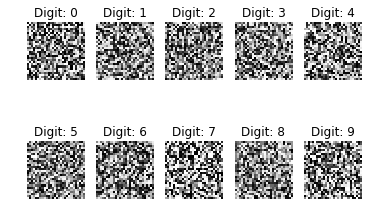

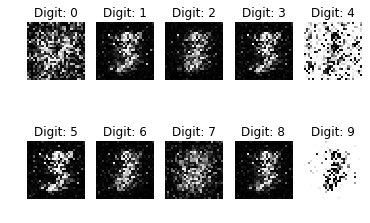

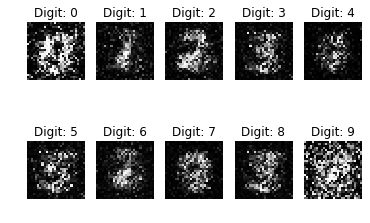

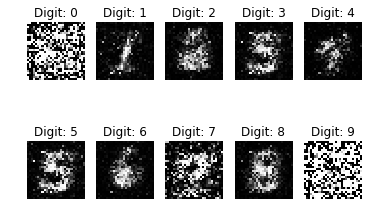

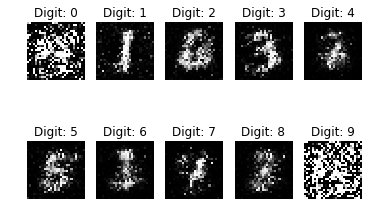

In [106]:
gan = CGAN()
gan.train(Xtrain,ytrain,epochs=1000, batch_size=32, sample_interval=200)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_200 (Dense)            (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_146 (LeakyReLU)  (None, 512)               0         
_________________________________________________________________
dense_201 (Dense)            (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_147 (LeakyReLU)  (None, 512)               0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_202 (Dense)            (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_148 (LeakyReLU)  (None, 512)               0         
__________

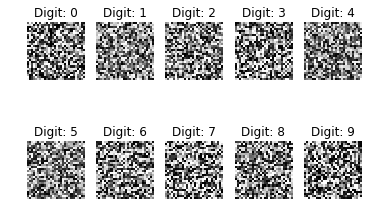

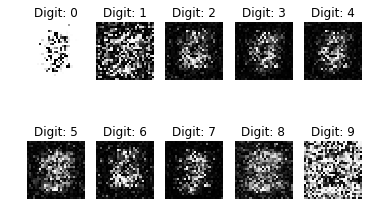

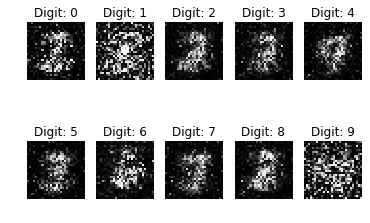

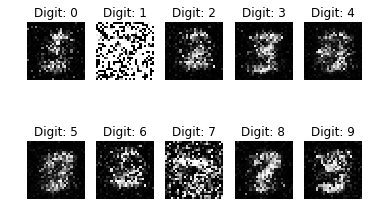

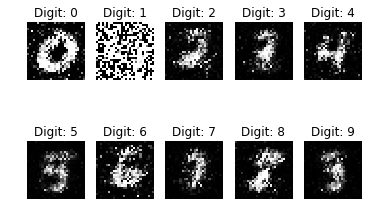

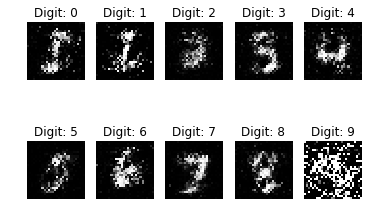

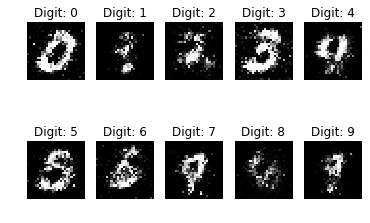

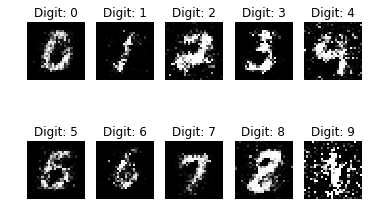

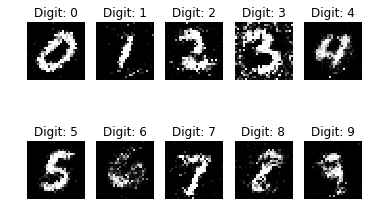

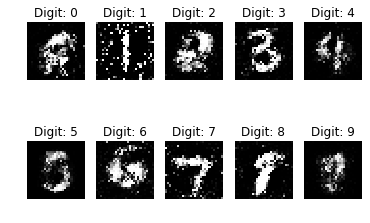

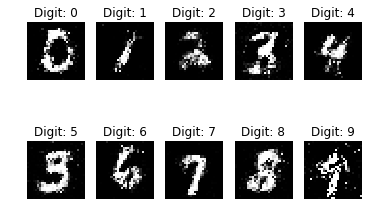

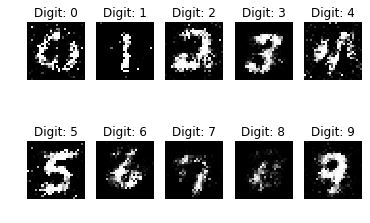

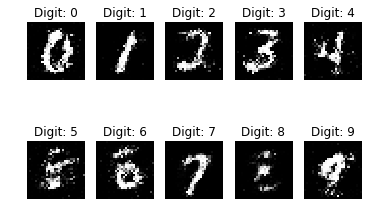

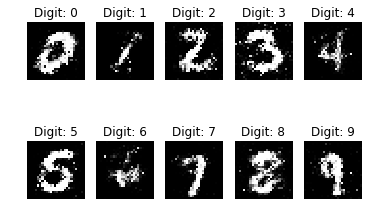

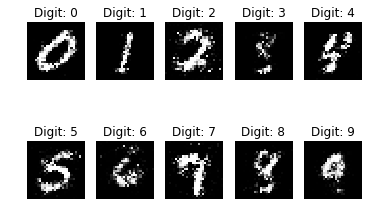

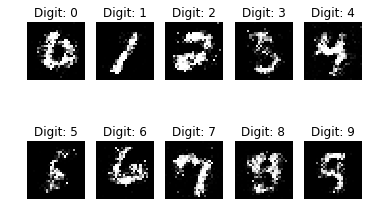

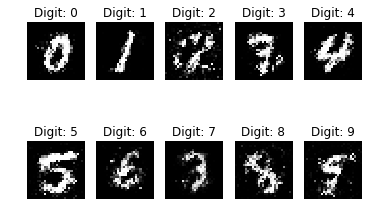

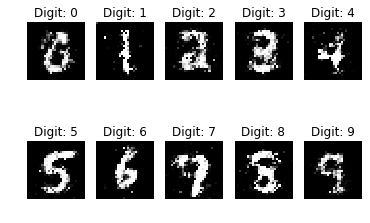

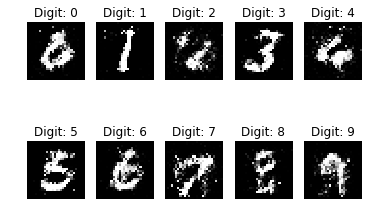

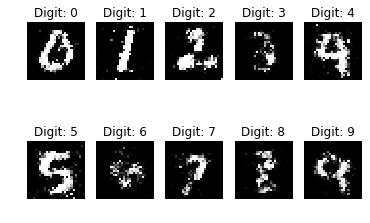

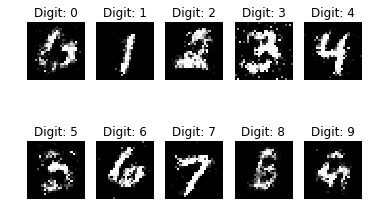

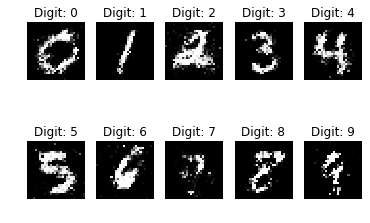

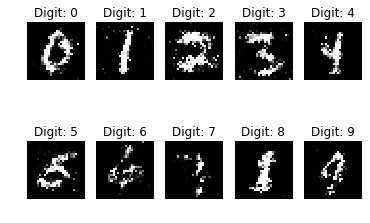

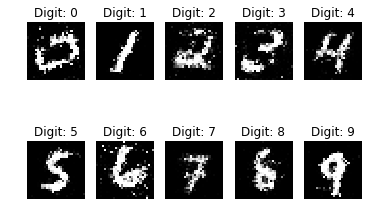

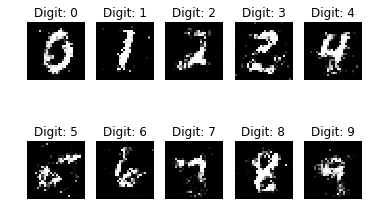

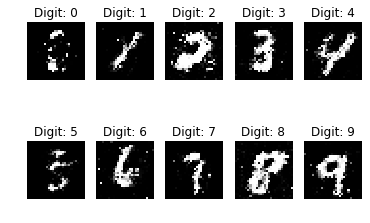

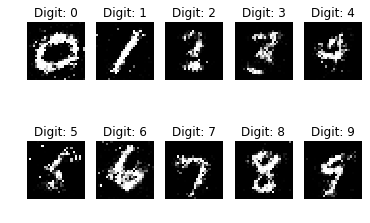

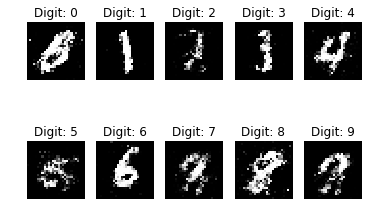

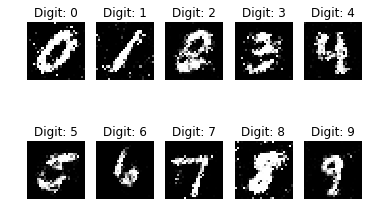

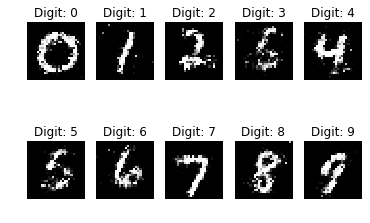

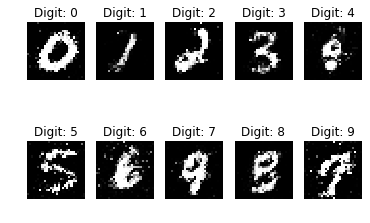

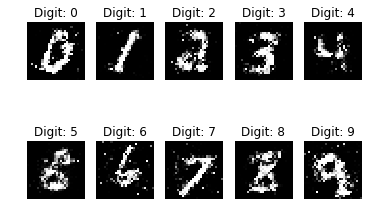

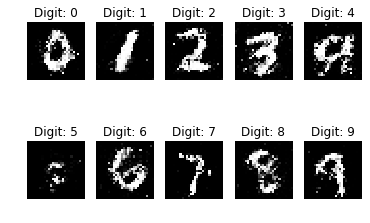

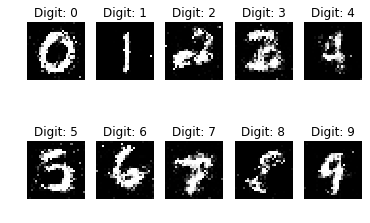

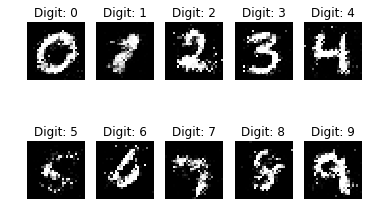

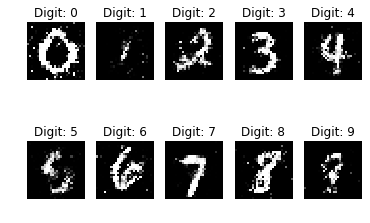

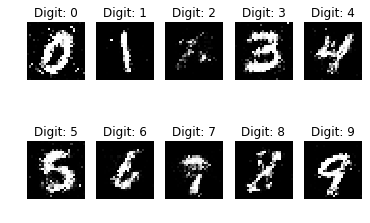

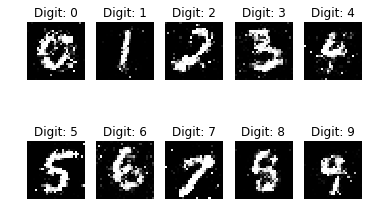

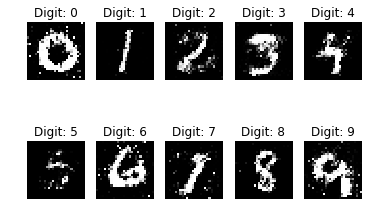

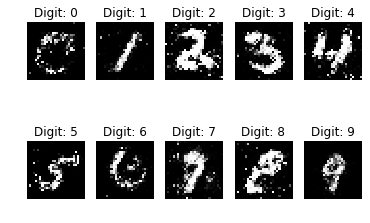

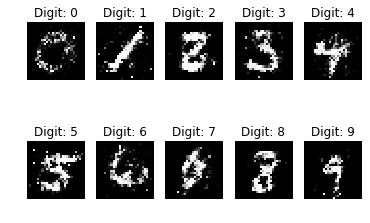

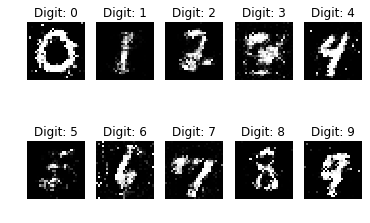

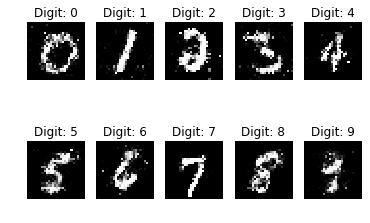

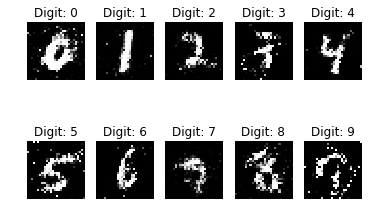

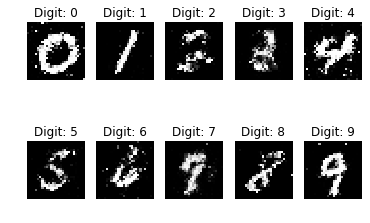

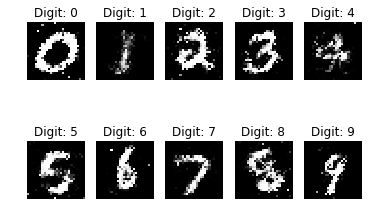

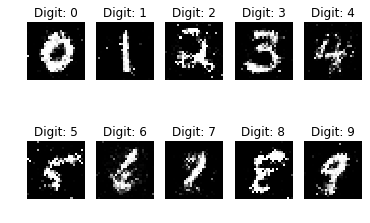

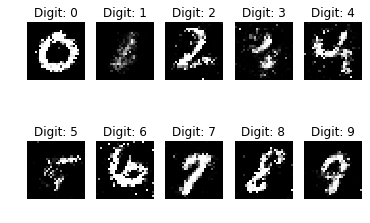

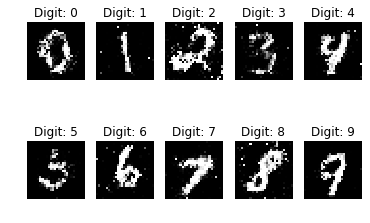

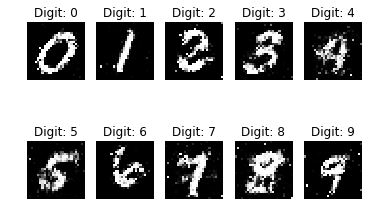

In [109]:
gan = CGAN()
gan.train(Xtrain,ytrain,epochs=10000, batch_size=32, sample_interval=200)